<a href="https://colab.research.google.com/github/SowmyaDontha88/Machine_Learning/blob/main/NN_GASTURBINES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import BatchNormalization
from sklearn.preprocessing import StandardScaler
from keras import backend

# **Problem Statement -> To build a model that accuretly predicts for TEY(Turbine Engine Yeild)**

In [ ]:
data = pd.read_csv('/content/gas_turbines.csv')

In [ ]:
data.head(3)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468


In [ ]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
data.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

We can proceed to the next step, as we don't have any missing values.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

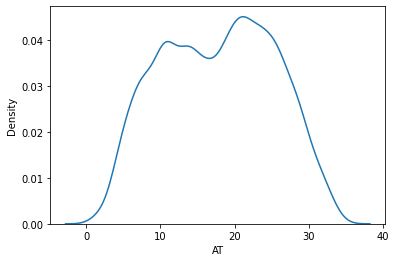

In [ ]:
sns.kdeplot(data=data,x='AT',warn_singular=True)
plt.show()

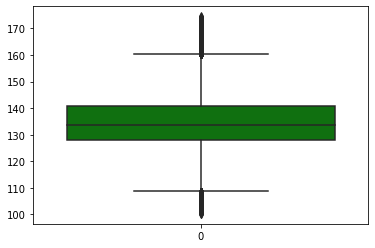

In [ ]:
sns.boxplot(data['TEY'], color = 'green')
plt.show()

We can observe that the target variable contains outliners.

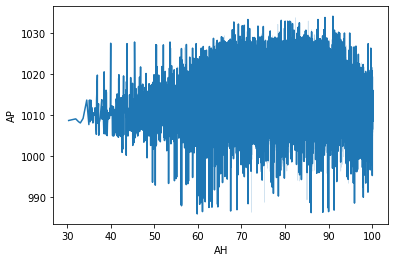

In [ ]:
sns.lineplot(data=data,x='AH',y='AP')
plt.show()

# **Finding Correlation**

In [ ]:
corr = data.corr()

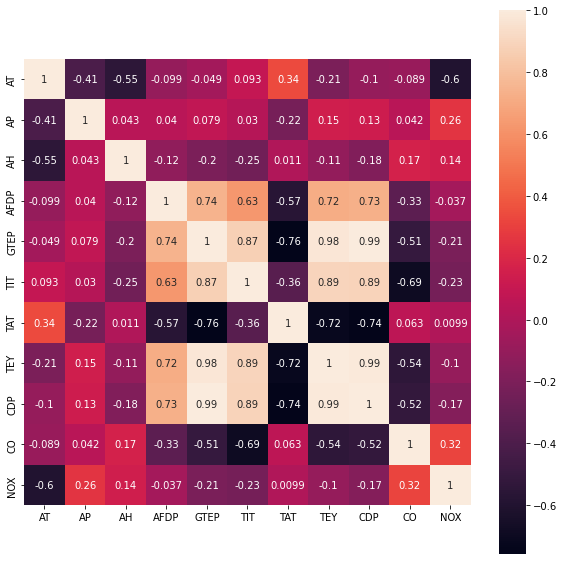

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,square=True,annot=True)
plt.show()

The heat map indicates the correlation between the variable and the target variable is perfectly correlated with GTEP,TIT and CDP attributes.

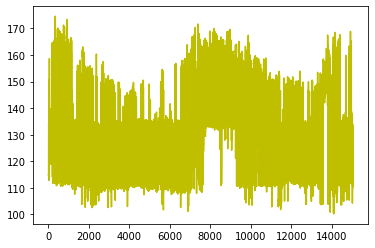

In [ ]:
plt.plot(data['TEY'],color='y')

# **Modelling**

In [ ]:
X = data.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= data.loc[:,['TEY']]

In [ ]:
scaled = StandardScaler()
X = scaled.fit_transform(X)
y = scaled.fit_transform(y)

Using StandardScaler function, the large values range scaled variables are scaled to values in between 0 to 1 inorder to increase the acceptance of small scaled values.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# **Building Neural Network**

In [ ]:
model = Sequential()
model.add(Dense(10,input_dim =10,kernel_initializer='random_uniform',activation='tanh'))
model.add(Dense(2,kernel_initializer='random_uniform',activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,kernel_initializer='random_uniform',activation='tanh'))
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=[rmse])

In [ ]:
history = model.fit(x_train,y_train,epochs = 35 ,batch_size=32,validation_split=0.1)

Epoch 1/35
297/297 [==============================] - 2s 4ms/step - loss: 0.5747 - rmse: 0.5309 - val_loss: 0.3370 - val_rmse: 0.4088
Epoch 2/35
297/297 [==============================] - 1s 3ms/step - loss: 0.2166 - rmse: 0.3518 - val_loss: 0.1466 - val_rmse: 0.2534
Epoch 3/35
297/297 [==============================] - 1s 3ms/step - loss: 0.1870 - rmse: 0.3351 - val_loss: 0.1394 - val_rmse: 0.2647
Epoch 4/35
297/297 [==============================] - 1s 3ms/step - loss: 0.1850 - rmse: 0.3400 - val_loss: 0.1415 - val_rmse: 0.2598
Epoch 5/35
297/297 [==============================] - 1s 3ms/step - loss: 0.1826 - rmse: 0.3380 - val_loss: 0.1369 - val_rmse: 0.2505
Epoch 6/35
297/297 [==============================] - 1s 3ms/step - loss: 0.1761 - rmse: 0.3250 - val_loss: 0.1389 - val_rmse: 0.2509
Epoch 7/35
297/297 [==============================] - 2s 5ms/step - loss: 0.1743 - rmse: 0.3249 - val_loss: 0.1350 - val_rmse: 0.2474
Epoch 8/35
297/297 [==============================] - 3s 11ms/

The model built has a root mean square error of 0.2388

In [ ]:
model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 10)                110       
                                                                 
 dense_109 (Dense)           (None, 2)                 22        
                                                                 
 batch_normalization_5 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_110 (Dense)           (None, 1)                 3         
                                                                 
Total params: 143
Trainable params: 139
Non-trainable params: 4
_________________________________________________________________


In [ ]:
y_predict = model.predict(x_test)

141/141 [==============================] - 1s 4ms/step


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_predict)

0.8595009026226477

In [ ]:
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# **Plotting the actual and predicted values**

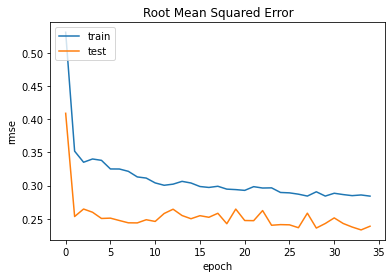

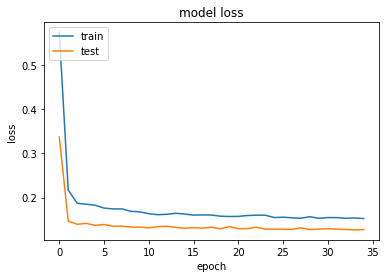

In [ ]:
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

From the above graph we can say that the model built is not accurately predicting the values.

# **Model building using Tensorflow**

In [ ]:
import tensorflow as tf


In [ ]:
X = data.drop(columns = ['TEY'], axis = 1) 
y = data.iloc[:,7]

In [ ]:
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

In [ ]:
model_tf = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model_tf.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)

In [ ]:
history = model.fit(x_train,y_train,epochs = 35 ,batch_size=32,validation_split=0.1)

Epoch 1/35
297/297 [==============================] - 1s 3ms/step - loss: 0.1514 - rmse: 0.2817 - val_loss: 0.1263 - val_rmse: 0.2331
Epoch 2/35
297/297 [==============================] - 2s 5ms/step - loss: 0.1538 - rmse: 0.2861 - val_loss: 0.1280 - val_rmse: 0.2428
Epoch 3/35
297/297 [==============================] - 1s 5ms/step - loss: 0.1545 - rmse: 0.2876 - val_loss: 0.1283 - val_rmse: 0.2459
Epoch 4/35
297/297 [==============================] - 1s 3ms/step - loss: 0.1508 - rmse: 0.2790 - val_loss: 0.1259 - val_rmse: 0.2308
Epoch 5/35
297/297 [==============================] - 1s 4ms/step - loss: 0.1513 - rmse: 0.2778 - val_loss: 0.1290 - val_rmse: 0.2539
Epoch 6/35
297/297 [==============================] - 1s 3ms/step - loss: 0.1535 - rmse: 0.2858 - val_loss: 0.1381 - val_rmse: 0.2914
Epoch 7/35
297/297 [==============================] - 1s 3ms/step - loss: 0.1539 - rmse: 0.2849 - val_loss: 0.1262 - val_rmse: 0.2330
Epoch 8/35
297/297 [==============================] - 1s 3ms/s

In [ ]:
history_tf = model_tf.fit(x_train, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
297/297 - 2s - loss: 0.0524 - mean_squared_error: 0.0524 - val_loss: 0.0040 - val_mean_squared_error: 0.0040 - 2s/epoch - 7ms/step
Epoch 2/100
297/297 - 1s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0028 - val_mean_squared_error: 0.0028 - 732ms/epoch - 2ms/step
Epoch 3/100
297/297 - 1s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0025 - val_mean_squared_error: 0.0025 - 679ms/epoch - 2ms/step
Epoch 4/100
297/297 - 1s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0022 - val_mean_squared_error: 0.0022 - 705ms/epoch - 2ms/step
Epoch 5/100
297/297 - 1s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0025 - val_mean_squared_error: 0.0025 - 649ms/epoch - 2ms/step
Epoch 6/100
297/297 - 1s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0027 - val_mean_squared_error: 0.0027 - 656ms/epoch - 2ms/step


This model has show very less value of root mean square error when compared to the above model. The value observed to be 0.0027

In [ ]:
model_tf.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_111 (Dense)           (None, 50)                550       
                                                                 
 dense_112 (Dense)           (None, 50)                2550      
                                                                 
 dense_113 (Dense)           (None, 50)                2550      
                                                                 
 dense_114 (Dense)           (None, 50)                2550      
                                                                 
 dense_115 (Dense)           (None, 1)                 51        
                                                                 
Total params: 8,251
Trainable params: 8,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_predict_tf = model_tf.predict(x_test)

141/141 [==============================] - 0s 2ms/step


In [ ]:
r2_score(y_test,y_predict_tf)

0.9976009505302368

In [ ]:
test_loss, mean_squared_error = model_tf.evaluate(x_test, y_test)

141/141 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023


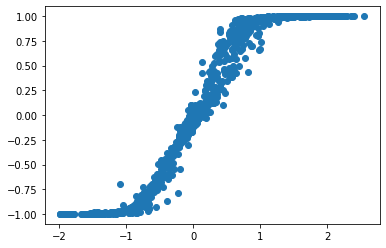

In [ ]:
predictions = model.predict_on_batch(x_test)
plt.scatter(y_test, predictions)

The scatterplot indicates that the predicted value accurately predicts the actual values.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
model_k = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(model_k, x_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.23 (0.19) MSE


In [ ]:
model_k.fit(x_train, y_train)

In [ ]:
prediction = model_k.predict(x_test)
prediction

array([ 2.5870383e-01, -1.0460734e+00,  1.0943420e-01, ...,
       -1.0238048e-03,  1.3998485e+00,  1.1374612e+00], dtype=float32)